# Optical Interconnection Network - Regression

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load Data

In [2]:
# Load dataframe (df) into appropriate format
df = pd.read_csv('optical_interconnection_network.csv', sep=';', decimal=',')
# Remove unnamed columns identified by (;)
df = df.loc[:, ~df.columns.str.match('^Unnamed')]

### 2.2. Analyze Data

In [3]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,UN,Client-Server,0.1,0.839546,1.974686,308.491814,700.514102,0.352431
1,64,4,UN,Client-Server,0.2,0.827412,9.556437,291.037663,864.599227,0.506302
2,64,4,UN,Client-Server,0.3,0.802605,27.027618,264.928002,839.372851,0.638516
3,64,4,UN,Client-Server,0.4,0.723403,61.848511,235.776888,1256.053108,0.767051
4,64,4,UN,Client-Server,0.5,0.721210,121.085884,189.680044,1343.875577,0.807812
...,...,...,...,...,...,...,...,...,...,...
635,16,10,PS,Asynchronous,0.6,0.792340,532.737732,363.094043,1214.057768,0.961042
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
637,16,10,PS,Asynchronous,0.8,0.618230,905.326843,206.922631,1421.304936,0.962500
638,16,10,PS,Asynchronous,0.9,0.564482,1048.269897,154.713952,2371.043062,0.979375


##### **Spatial Distribution:**

- **UN:** Uniform
- **HR:** Hot Region
- **BR:** Bit Reverse
- **PS:** Perfect Shuffle

In [4]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    float64
 5   Processor Utilization   640 non-null    float64
 6   Channel Waiting Time    640 non-null    float64
 7   Input Waiting Time      640 non-null    float64
 8   Network Response Time   640 non-null    float64
 9   Channel Utilization     640 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 50.1+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Node Number               0
Thread Number             0
Spatial Distribution      0
Temporal Distribution     0
T/R                       0
Processor Utilization     0
Channel Waiting Time      0
Input Waiting Time        0
Network Response Time     0
Channel Utilization       0
dtype: int64

In [6]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [7]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.000000,7.000000,0.550000,0.649013,377.459157,333.247102,1504.247529,26.347886
std,24.018772,2.237817,0.287453,0.194737,381.974899,233.721860,1202.606968,223.782214
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,0.529210,0.136979
25%,16.000000,5.500000,0.300000,0.492530,29.247560,137.730986,580.676198,0.587539
50%,40.000000,7.000000,0.550000,0.624787,265.614624,261.855556,1232.150369,0.773611
75%,64.000000,8.500000,0.800000,0.833106,664.965408,485.943680,2115.326618,0.905573
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,2895.323131


### 2.3. Clean Data

In [8]:
# Sort dataframe according to Channel Utilization
df_sorted = df.sort_values(by=['Channel Utilization'])

In [9]:
df_sorted.tail(15)

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
159,64,10,PS,Client-Server,1.0,0.509802,1211.382568,147.265376,5919.152636,0.980382
639,16,10,PS,Asynchronous,1.0,0.515257,1184.647461,136.375081,2592.966463,0.980903
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
477,16,10,PS,Client-Server,0.8,0.635748,928.996765,176.748269,2980.861045,0.982778
478,16,10,PS,Client-Server,0.9,0.574563,1072.681763,152.513064,3372.189353,0.990312
120,64,4,PS,Client-Server,0.1,0.828573,1.934532,281.991851,0.529210,607.869882
121,64,4,PS,Client-Server,0.2,0.824084,9.550200,262.127869,0.633802,902.966929
122,64,4,PS,Client-Server,0.3,0.795685,26.339130,239.734762,0.718047,1042.409722
124,64,4,PS,Client-Server,0.5,0.695053,126.209816,176.588953,0.822266,1202.936709
123,64,4,PS,Client-Server,0.4,0.739597,56.360073,230.163026,0.778299,1219.612435


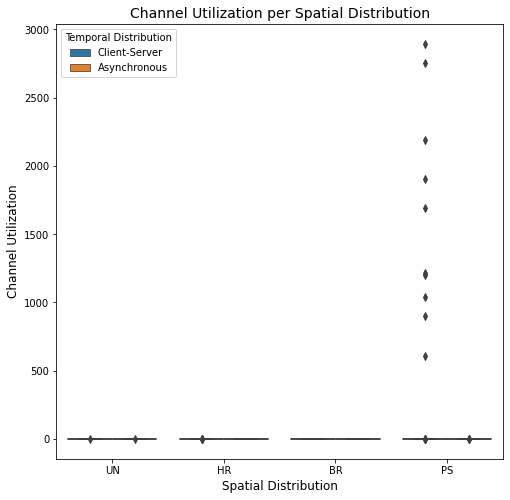

In [10]:
# As seen above, those final ten rows indicate unusually-high Channel 
# Utilization well over 100%.
# Graphically, these outliers are represented as diamonds on a box plot as seen 
# below:

# Define figure
plt.figure(figsize=(8,8))
# Show original results
sns.boxplot(x=df['Spatial Distribution'], y=df['Channel Utilization'], 
            hue=df['Temporal Distribution'])
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
# Show figure
plt.show()

In [11]:
# Remove last 10 rows of sorted dataframe
df_sorted.drop(df_sorted.tail(10).index, inplace=True)

In [12]:
df_sorted

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
560,16,4,BR,Asynchronous,0.1,0.442501,1.013195,381.615554,19.110126,0.136979
240,64,4,BR,Asynchronous,0.1,0.590286,1.474199,313.118038,26.502746,0.137726
570,16,6,BR,Asynchronous,0.1,0.487785,1.119696,498.820922,19.484081,0.149965
250,64,6,BR,Asynchronous,0.1,0.648118,1.745482,501.624530,21.445301,0.151797
580,16,8,BR,Asynchronous,0.1,0.508909,1.348418,652.238802,18.983249,0.153542
...,...,...,...,...,...,...,...,...,...,...
159,64,10,PS,Client-Server,1.0,0.509802,1211.382568,147.265376,5919.152636,0.980382
639,16,10,PS,Asynchronous,1.0,0.515257,1184.647461,136.375081,2592.966463,0.980903
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
477,16,10,PS,Client-Server,0.8,0.635748,928.996765,176.748269,2980.861045,0.982778


In [13]:
# Updated dataframe statistics
df_sorted.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,39.619048,7.047619,0.550000,0.649192,380.302534,335.783999,1528.112170,0.721877
std,24.016044,2.223080,0.287456,0.195312,383.702712,234.523491,1196.975056,0.203917
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,18.983249,0.136979
25%,16.000000,6.000000,0.300000,0.492629,29.551503,137.952154,610.232346,0.585052
50%,16.000000,8.000000,0.550000,0.624115,269.269196,264.890081,1263.970861,0.769844
75%,64.000000,10.000000,0.800000,0.835392,668.430801,495.312932,2125.945976,0.901231
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,0.990312


In [14]:
# Get values for matrix of features (X) and dependent variable (y)
X, y = df_sorted.iloc[:, :-1].values, df_sorted.iloc[:, -1].values

print(X.shape, y.shape)

(630, 9) (630,)


### 2.4. Visualize Data

#### Pairwise Relationships between Features

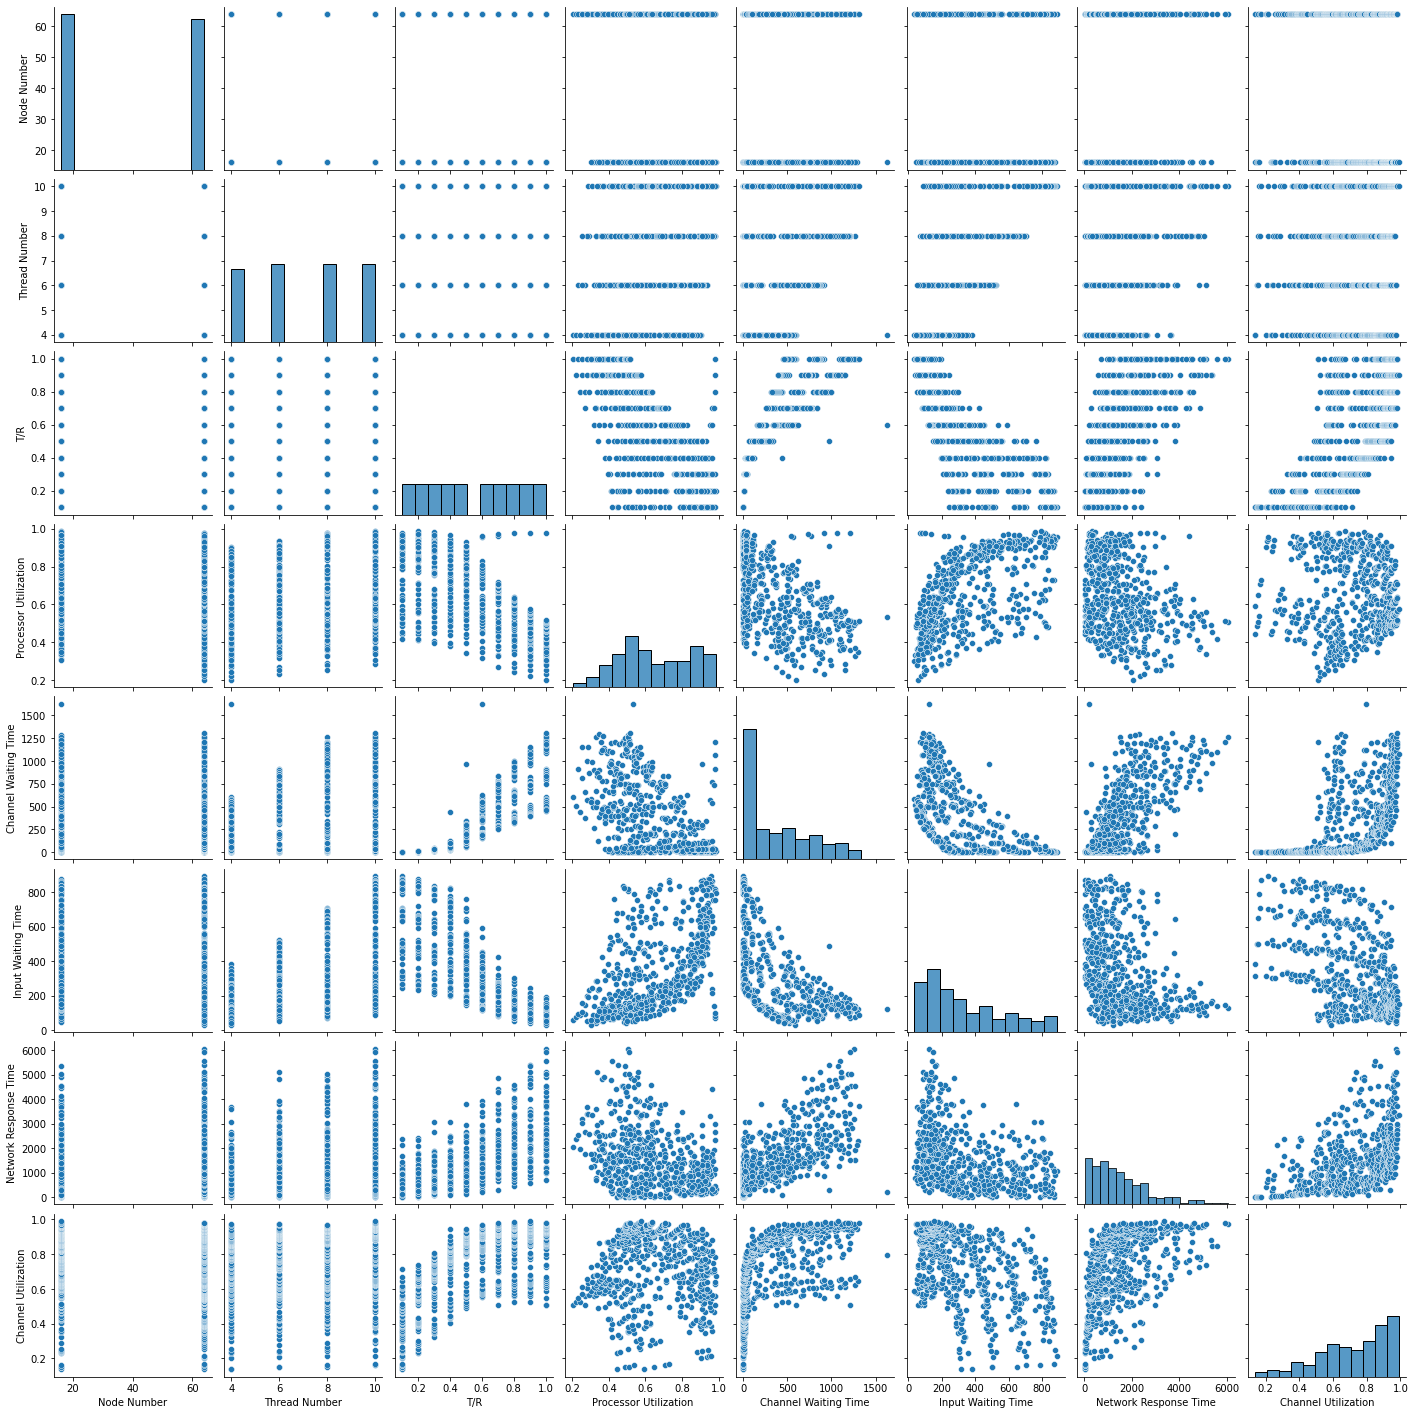

In [15]:
# Pairwise distributions
sns.pairplot(df_sorted)

# Show figure
plt.show()

#### Correlation Map

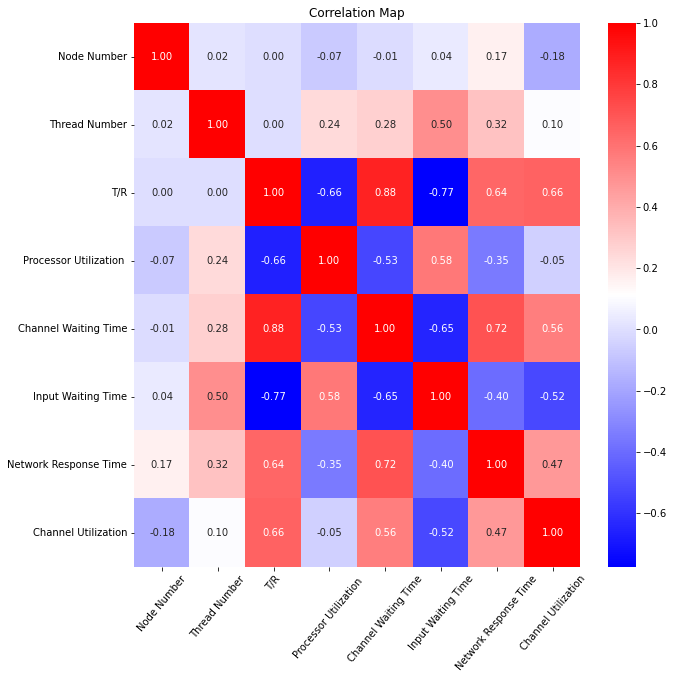

In [16]:
# Define correlation map figure
plt.figure(figsize=(10,10))

# Correlation Map
sns.heatmap(df_sorted.corr(), cmap='bwr', annot=True, fmt = ".2f")
# Adjust axes labels
plt.xticks(rotation=50)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

#### Channel Utilization per Spatial Distribution

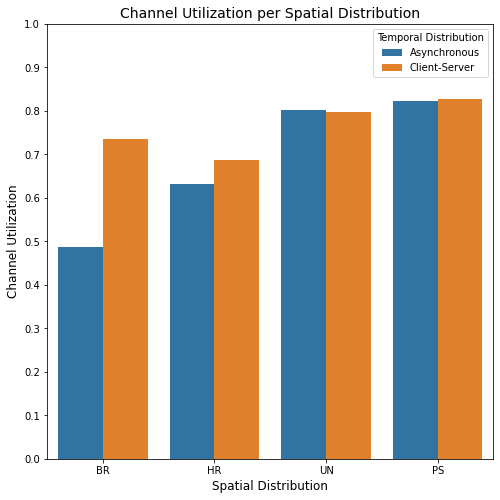

In [17]:
# Define figure
plt.figure(figsize=(8,8))

# Channel Utilization bar chart
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Utilization'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 1.1, 0.1))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)

# Show figure
plt.show()

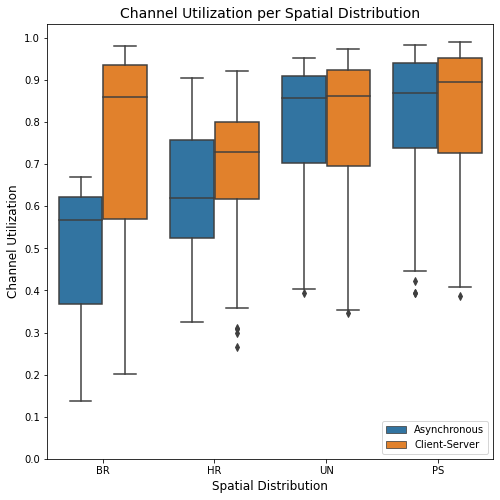

In [18]:
# Define figure
plt.figure(figsize=(8,8))

# Channel Utilization box plot
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Utilization'], 
            hue=df_sorted['Temporal Distribution'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 1.1, 0.1))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
# Plot legend
plt.legend(loc='lower right')

# Show figure
plt.show()

#### Channel Waiting Time per Spatial Distribution

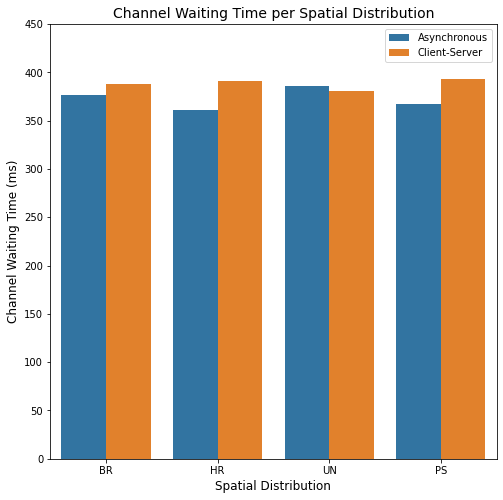

In [19]:
# Define figure
plt.figure(figsize=(8,8))

# Channel Waiting Time bar chart
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Waiting Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 500, 50))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time (ms)', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
# Plot legend
plt.legend(loc='upper right')

# Show figure
plt.show()

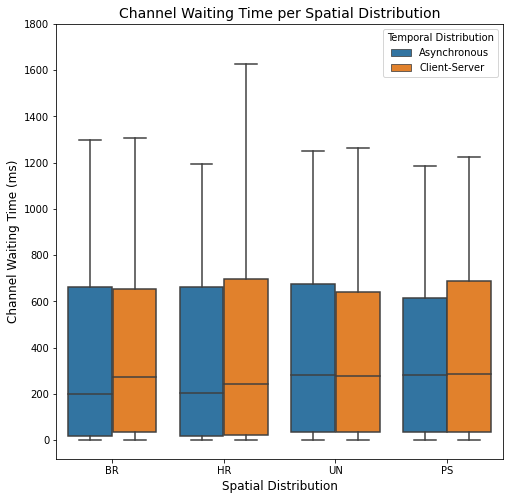

In [20]:
# Define figure
plt.figure(figsize=(8,8))

# Channel Waiting Time box plot
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Channel Waiting Time'], 
            hue=df_sorted['Temporal Distribution'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 2000, 200))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time (ms)', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)

# Show figure
plt.show()

#### Processor Utilization per Spatial Distribution

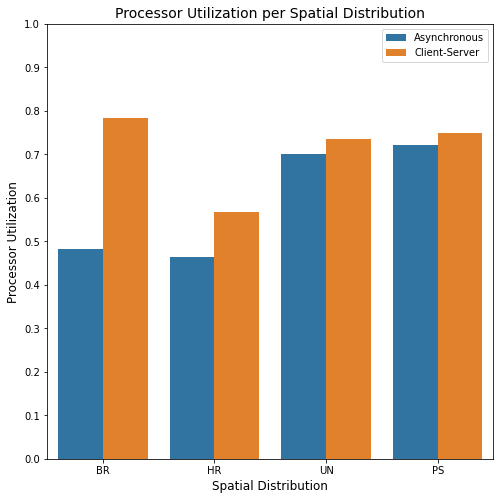

In [21]:
# Define figure
plt.figure(figsize=(8,8))

# Processor Utilization bar chart
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Processor Utilization '], 
            hue=df_sorted['Temporal Distribution'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 1.1, 0.1))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
# Plot legend
plt.legend(loc='upper right')

# Show figure
plt.show()

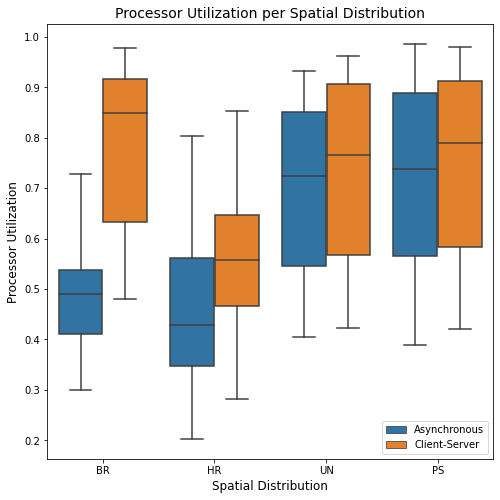

In [22]:
# Define figure
plt.figure(figsize=(8,8))

# Processor Utilization box plot
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Processor Utilization '], 
            hue=df_sorted['Temporal Distribution'])
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
# Plot legend
plt.legend(loc='lower right')

# Show figure
plt.show()

#### Network Response Time per Spatial Distribution

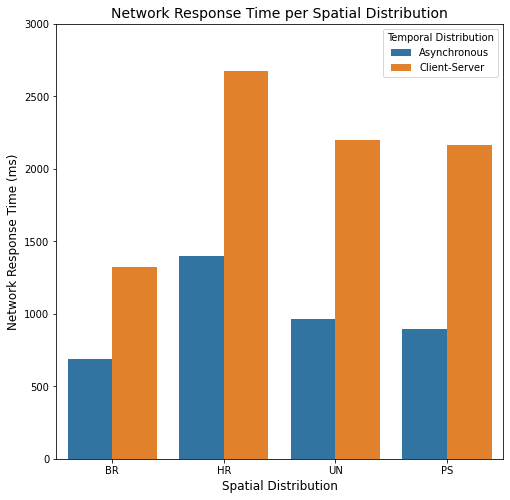

In [23]:
# Define figure
plt.figure(figsize=(8,8))

# Network Response Time bar chart
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Network Response Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 3500, 500))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time (ms)', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)

# Show figure
plt.show()

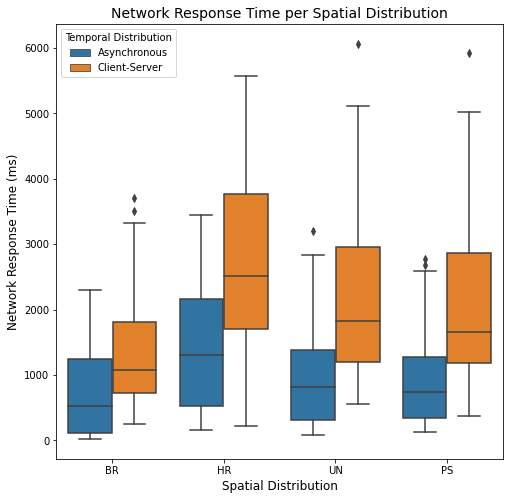

In [24]:
# Define figure
plt.figure(figsize=(8,8))

# Network Response Time box plot
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Network Response Time'], 
            hue=df_sorted['Temporal Distribution'])
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time (ms)', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)

# Show figure
plt.show()

#### Input Waiting Time per Spatial Distribution

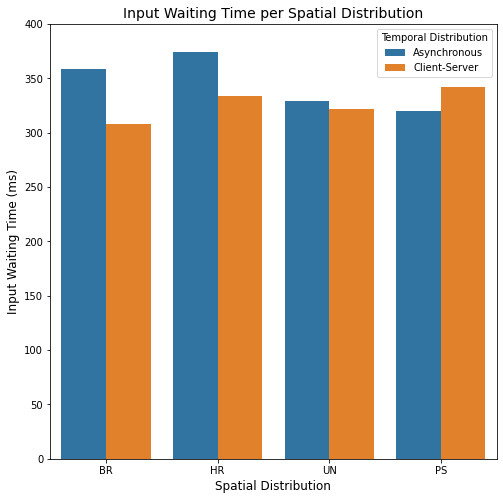

In [25]:
# Define figure
plt.figure(figsize=(8,8))

# Input Waiting Time bar chart
sns.barplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Input Waiting Time'], 
            hue=df_sorted['Temporal Distribution'], ci=None)
# Adjust Y-Axis range
plt.yticks(np.arange(0, 450, 50))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time (ms)', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)

# Show figure
plt.show()

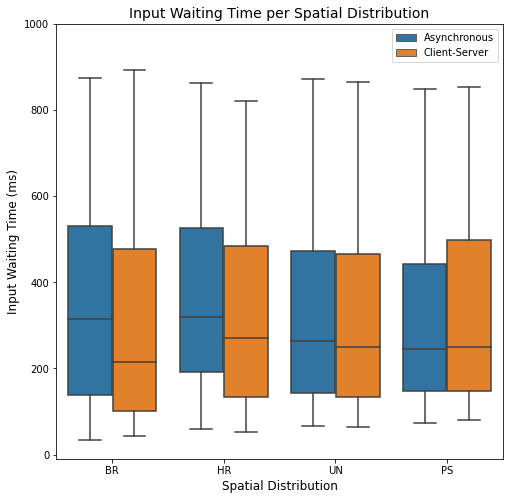

In [26]:
# Define figure
plt.figure(figsize=(8,8))

# Input Waiting Time box plot
sns.boxplot(x=df_sorted['Spatial Distribution'], y=df_sorted['Input Waiting Time'], 
            hue=df_sorted['Temporal Distribution'])
# Adjust Y-Axis range
plt.yticks(np.arange(0, 1200, 200))
# Plot title and labels
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time (ms)', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
# Plot legend
plt.legend(loc='upper right')

# Show figure
plt.show()

### 2.5. Feature Engineering

In [27]:
# Label Encode the Spatial Distribution column
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [28]:
# One-Hot Encode the Temporal Distribution column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], 
                       remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [29]:
X[:5, :]

array([[1.0, 0.0, 16, 4, 0, 0.1, 0.442501, 1.013195, 381.615554,
        19.110126],
       [1.0, 0.0, 64, 4, 0, 0.1, 0.590286, 1.474199, 313.118038,
        26.502746],
       [1.0, 0.0, 16, 6, 0, 0.1, 0.487785, 1.119696, 498.820922,
        19.484081],
       [1.0, 0.0, 64, 6, 0, 0.1, 0.648118, 1.745482, 501.62453,
        21.445301],
       [1.0, 0.0, 16, 8, 0, 0.1, 0.508909, 1.348418, 652.238802,
        18.983249]], dtype=object)

In [30]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [31]:
# Feature scaling - Standardization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 3. Define and Evaluate Models

In [32]:
# Linear Regression (LR)
from sklearn.linear_model import LinearRegression
# Support Vector Machine - Regression (SVR)
from sklearn.svm import SVR
# XGBoost (XGB)
import xgboost as xgb
from xgboost import XGBRegressor
# Deep Neural Network (DNN)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Additional Libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

#### **Important Functions**

In [33]:
# Summarize prediction results
def summarize_results(model):
  """
  model - Summarize results for Machine Learning model
  """

  # Mean Absolute Error (MAE)
  print('MAE: %.3f' % (mean_absolute_error(y_test, model)))
  # Mean Squared Error (MSE)
  print('MSE: %.3f' % (mean_squared_error(y_test, model)))
  # Root Mean Squared Error (RMSE)
  print('RMSE: %.3f' % (mean_squared_error(y_test, model, squared=False)))
  # R^2 Score (Goodness-of-Fit)
  print('R^2 Score: %.3f' % (r2_score(y_test, model)))

In [34]:
# Plot prediction and validation distributions
def plot_dist(model, colour, a, x_range, y_range):
  """
  model   - Machine Learning model implemented
  colour  - Colour for predictions
  a       - Colour adjustment for predictions (alpha)
  x_range - X-Axis range of values
  y_range - Y-Axis range of values
  """
  
  # Define subplot figure
  fig = plt.figure(figsize=(15, 12))

  # Histogram for predicted model
  ax1 = fig.add_subplot(2, 2, 1)
  ax1 = plt.hist(x=model, facecolor=colour, alpha=a, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Channel Utilization', fontsize=12)
  plt.ylabel('Number of Measurements', fontsize=12)
  plt.title('Predicted Channel Utilization', fontsize=14)

  # Histogram for y_test
  ax2 = fig.add_subplot(2, 2, 2)
  ax2 = plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
  # Adjust axes range(s)
  plt.xticks(x_range)
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Channel Utilization', fontsize=12)
  plt.ylabel('Number of Measurements', fontsize=12)
  plt.title('Validation Channel Utilization', fontsize=14)

  # Box plot for predicted model
  ax3 = fig.add_subplot(2, 2, 3)
  ax3 = sns.boxplot(x=model, color=colour)
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Channel Utilization', fontsize=12)
  plt.title('Predicted Channel Utilization', fontsize=14)

  # Box plot for y_test
  ax4 = fig.add_subplot(2, 2, 4)
  ax4 = sns.boxplot(x=y_test, color='orange')
  # Adjust axes range(s)
  plt.xticks(x_range)
  # Plot title and label(s)
  plt.xlabel('Channel Utilization', fontsize=12)
  plt.title('Validation Channel Utilization', fontsize=14)

  # Return figure to show
  return fig

In [35]:
# Plot results trends
def pred_results(model, pred, y_range, train_window, test_window, 
                 train_legend_loc, test_legend_loc):
  """
  model            - Machine Learning model implemented
  pred             - Model predictions
  y_range          - Y-Axis range of values
  train_window     - Extra space for legend (training set)
  test_window      - Extra space for legend (test set)
  train_legend_loc - Legend location for training set prediction trends
  test_legend_loc  - Legend location for test set prediction trends
  """

  # Define subplot
  results_fig = plt.figure(figsize=(16, 12))

  # Training set plot
  ax1 = results_fig.add_subplot(2, 1, 1)
  plt.plot(y_train, color = 'red', label = 'Training Set')
  plt.plot(model.predict(X_train), color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(X_train)+train_window, train_window))
  plt.yticks(y_range)
  # Plot title and label(s)
  plt.xlabel('Number of Measurements', fontsize=12)
  plt.ylabel('Channel Utilization', fontsize=12)
  plt.title('Predicted Channel Utilization', fontsize=14)
  # Legend and grid
  plt.legend(loc=train_legend_loc)
  plt.grid()

  # Test set plot
  ax2 = results_fig.add_subplot(2, 1, 2)
  plt.plot(y_test, color = 'red', label = 'Test Set')
  plt.plot(pred, color = 'blue', label = 'Prediction')
  # Adjust axes range(s)
  plt.xticks(np.arange(0, len(y_test)+test_window, test_window))
  plt.yticks(y_range)
  plt.xlabel('Number of Measurements', fontsize=12)
  plt.ylabel('Channel Utilization', fontsize=12)
  plt.title('Validation Channel Utilization', fontsize=14)
  # Legend and grid
  plt.legend(loc=test_legend_loc)
  plt.grid()

  # Return figure to show
  return results_fig

In [36]:
# Apply k-Fold Cross Validation on the training set
def k_fold(model, n=10):
  """
  model - Machine Learning model implemented
  n     - number of k-Folds (default 10)
  """
  
  # Lists of values
  r2_means, r2_stds, r2_mins, r2_maxs = [], [], [], []  # R^2 Scoring
  rmse_means, rmse_stds, rmse_mins, rmse_maxs = [], [], [], []  # RMSE Scoring
  # Cross validate for n k-folds (RepeatedKFold - no repeats)
  for i in range(2, 2+n):
    cv = RepeatedKFold(n_splits = i, random_state = 0)
    # Collect appropriate Key Performance Indicator (KPI) results per k-Fold
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
    # mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
    
    # Force scores to be positive
    r2_scores = abs(r2_scores)
    rmse_scores = abs(rmse_scores)

    # Print R^2 scores
    print('')
    print('-- Fold: %d --' % (i-1))
    print('')
    print('R^2 Scoring:')
    print("Mean: %f" % (np.mean(r2_scores)))
    print("Std: +/- %f" % (np.std(r2_scores)))
    print("Min: %f" % (np.min(r2_scores)))
    print("Max: %f" % (np.max(r2_scores)))
    
    # Print RMSE scores
    print('')
    print('RMSE Scoring:')
    print("Mean: %f" % (np.mean(rmse_scores)))
    print("Std: +/- %f" % (np.std(rmse_scores)))
    print("Min: %f" % (np.min(rmse_scores)))
    print("Max: %f" % (np.max(rmse_scores)))
    print('')
    
    # Append R^2 scores
    r2_means.append(np.mean(r2_scores))
    r2_stds.append(np.std(r2_scores))
    r2_mins.append(np.min(r2_scores))
    r2_maxs.append(np.max(r2_scores))

    # Append RMSE scores
    rmse_means.append(np.mean(rmse_scores))
    rmse_stds.append(np.std(rmse_scores))
    rmse_mins.append(np.min(rmse_scores))
    rmse_maxs.append(np.max(rmse_scores))

  # Define subplot figure
  k_fold_results = plt.figure(figsize=(15, 10))

  # Plot R^2 scores per k-fold:
  ax1 = k_fold_results.add_subplot(2, 2, 1)
  ax1.plot(np.arange(1,1+n), r2_means, color='red', label='Mean')
  ax1.plot(np.arange(1,1+n), r2_mins, color='green', label='Min')
  ax1.plot(np.arange(1,1+n), r2_maxs, color='blue', label='Max')
  # Plot title and label(s)
  ax1.set_xlabel('k-Fold', fontsize=12)
  ax1.set_ylabel('R^2 Score', fontsize=12)
  ax1.set_title('R^2 Score per k-Fold', fontsize=14)
  # Legend and grid
  ax1.legend()
  ax1.grid(True)

  # Plot R^2 Standard Deviations per k-fold:
  ax2 = k_fold_results.add_subplot(2, 2, 2)
  ax2.plot(np.arange(1,1+n), r2_stds, color='red')
  # Plot title and label(s)
  ax2.set_xlabel('k-Fold', fontsize=12)
  ax2.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax2.set_title('R^2 Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax2.grid(True)

  # Plot RMSE scores per k-fold:
  ax3 = k_fold_results.add_subplot(2, 2, 3)
  ax3.plot(np.arange(1,1+n), rmse_means, color='orangered', label='Mean')
  ax3.plot(np.arange(1,1+n), rmse_mins, color='green', label='Min')
  ax3.plot(np.arange(1,1+n), rmse_maxs, color='blue', label='Max')
  # Plot title and label(s)
  ax3.set_xlabel('k-Fold', fontsize=12)
  ax3.set_ylabel('RMSE Score', fontsize=12)
  ax3.set_title('RMSE Score per k-Fold', fontsize=14)
  # Legend and grid
  ax3.legend()
  ax3.grid(True)

  # Plot RMSE Standard Deviations per k-fold:
  ax4 = k_fold_results.add_subplot(2, 2, 4)
  ax4.plot(np.arange(1,1+n), rmse_stds, color='orangered')
  # Plot title and label(s)
  ax4.set_xlabel('k-Fold', fontsize=12)
  ax4.set_ylabel('Standard Deviation (+/-)', fontsize=12)
  ax4.set_title('RMSE Standard Deviation per k-fold', fontsize=14)
  # Set grid
  ax4.grid(True)

  # Show subplot
  plt.show()

  # Return cv for Grid Searching hyperparameter tuning (optimization)
  return cv

### Linear Regression (LR)

In [37]:
# Define LR model
lr_reg = LinearRegression()

# Train LR model
lr_reg.fit(X_train, y_train)

LinearRegression()

In [38]:
# Predict test set results
lr_pred = lr_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((lr_pred.reshape(len(lr_pred), 1), 
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(lr_pred)

MAE: 0.065
MSE: 0.007
RMSE: 0.082
R^2 Score: 0.847


<table border = "1">
  <thead>
    <th colspan = "5">Linear Regression Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.065</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.007</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.082</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.847</td>
    </tr>
  </tbody>
</table>

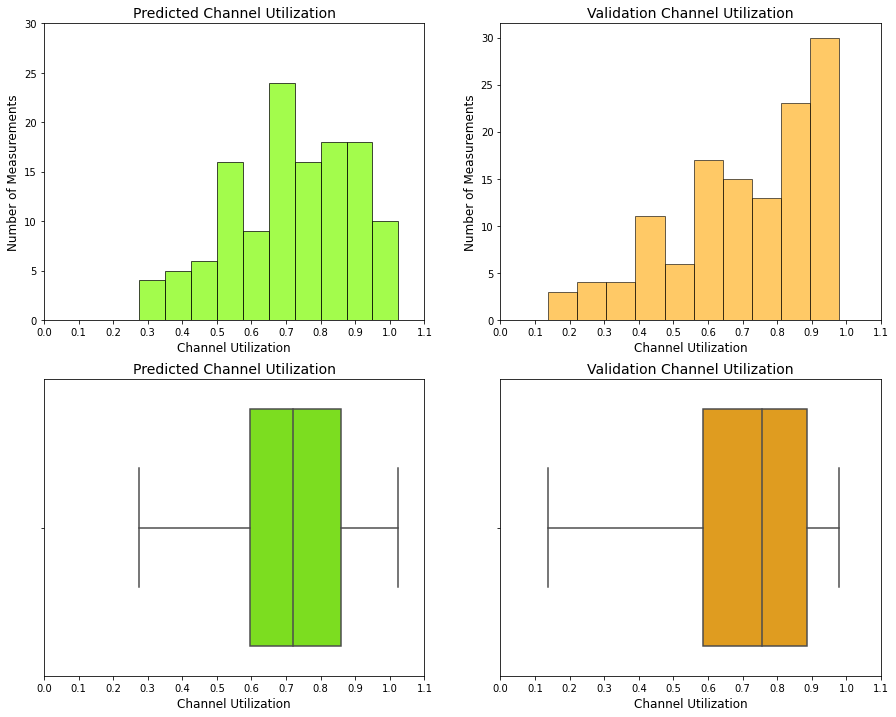

In [39]:
# Display LR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lr_dist = plot_dist(lr_pred, 'lawngreen', 0.7, np.arange(0, 1.2, 0.1), 
                    np.arange(0, 35, 5))

# Show subplot
plt.show()

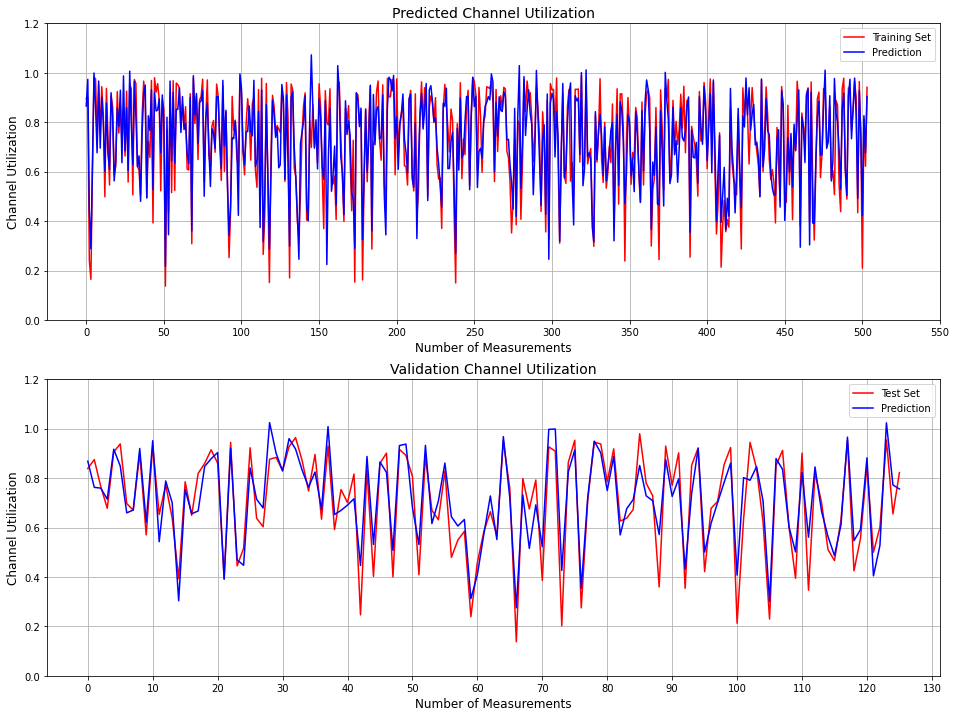

In [40]:
# Display LR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lr_results = pred_results(lr_reg, lr_pred, np.arange(0, 1.4, 0.2), 50, 10, 
                          "upper right", "upper right")

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.779333
Std: +/- 0.026814
Min: 0.726634
Max: 0.830034

RMSE Scoring:
Mean: 0.094655
Std: +/- 0.007178
Min: 0.082159
Max: 0.106563


-- Fold: 2 --

R^2 Scoring:
Mean: 0.774448
Std: +/- 0.040255
Min: 0.678350
Max: 0.839064

RMSE Scoring:
Mean: 0.095425
Std: +/- 0.010411
Min: 0.080027
Max: 0.117448


-- Fold: 3 --

R^2 Scoring:
Mean: 0.772073
Std: +/- 0.063193
Min: 0.641650
Max: 0.879245

RMSE Scoring:
Mean: 0.095153
Std: +/- 0.014457
Min: 0.073184
Max: 0.127523


-- Fold: 4 --

R^2 Scoring:
Mean: 0.769214
Std: +/- 0.084835
Min: 0.518121
Max: 0.885505

RMSE Scoring:
Mean: 0.094741
Std: +/- 0.016202
Min: 0.072054
Max: 0.132623


-- Fold: 5 --

R^2 Scoring:
Mean: 0.770901
Std: +/- 0.089604
Min: 0.488729
Max: 0.882096

RMSE Scoring:
Mean: 0.094321
Std: +/- 0.017727
Min: 0.070882
Max: 0.136312


-- Fold: 6 --

R^2 Scoring:
Mean: 0.768345
Std: +/- 0.103559
Min: 0.448752
Max: 0.895297

RMSE Scoring:
Mean: 0.093912
Std: +/- 0.019594
Min: 0.063029
Max: 0.153256

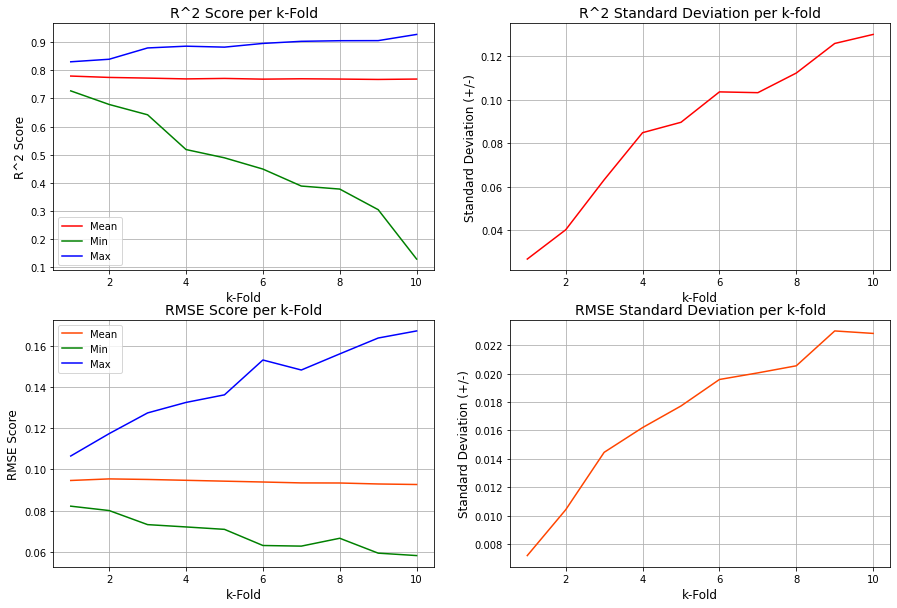

In [41]:
# Linear Regression - k-Fold Cross Validation
lr_cv = k_fold(lr_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Linear Regression Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.769</td>
      <td>0.093</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.130</td>
      <td>0.023</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.129</td>
      <td>0.058</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.927</td>
      <td>0.167</td>
    </tr>
  </tbody>
</table>

### Linear Support Vector Regression (Linear SVR)

In [42]:
# Define Linear SVR model
linear_svr = SVR(kernel='linear', C=0.05, epsilon=0.062)

# Train Linear SVR model
linear_svr.fit(X_train,  y_train)

SVR(C=0.05, epsilon=0.062, kernel='linear')

In [43]:
# Predict test set results
linear_svr_pred = linear_svr.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((linear_svr_pred.reshape(len(linear_svr_pred), 1), 
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(linear_svr_pred)

MAE: 0.063
MSE: 0.007
RMSE: 0.082
R^2 Score: 0.845


<table border = "1">
  <thead>
    <th colspan = "5">Linear SVR Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.063</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.007</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.082</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.845</td>
    </tr>
  </tbody>
</table>

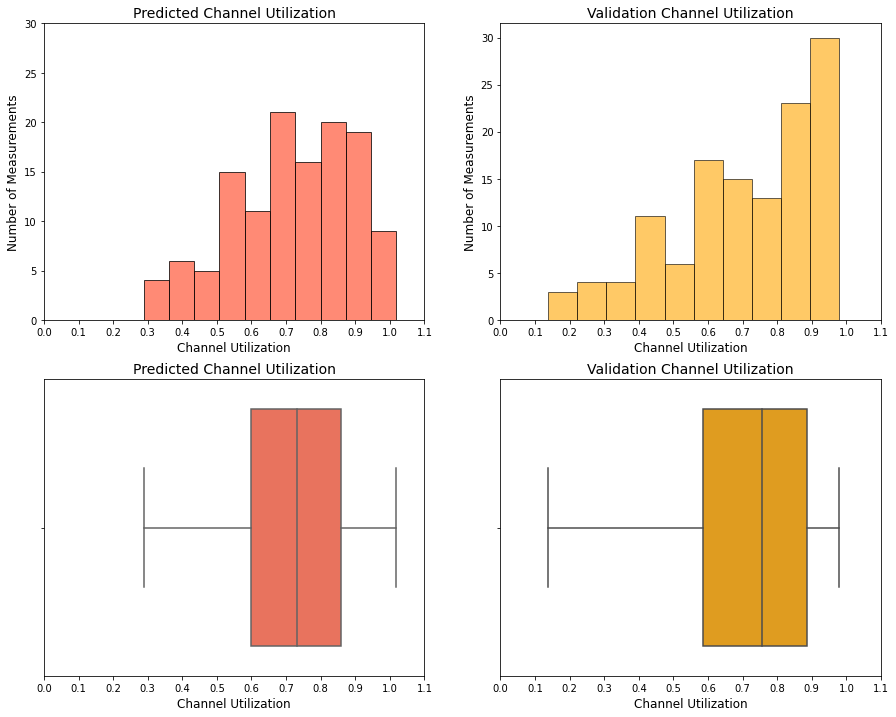

In [44]:
# Display Linear SVR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
lsvr_dist = plot_dist(linear_svr_pred, 'tomato', 0.75, np.arange(0, 1.2, 0.1), 
                      np.arange(0, 35, 5))

# Show subplot
plt.show()

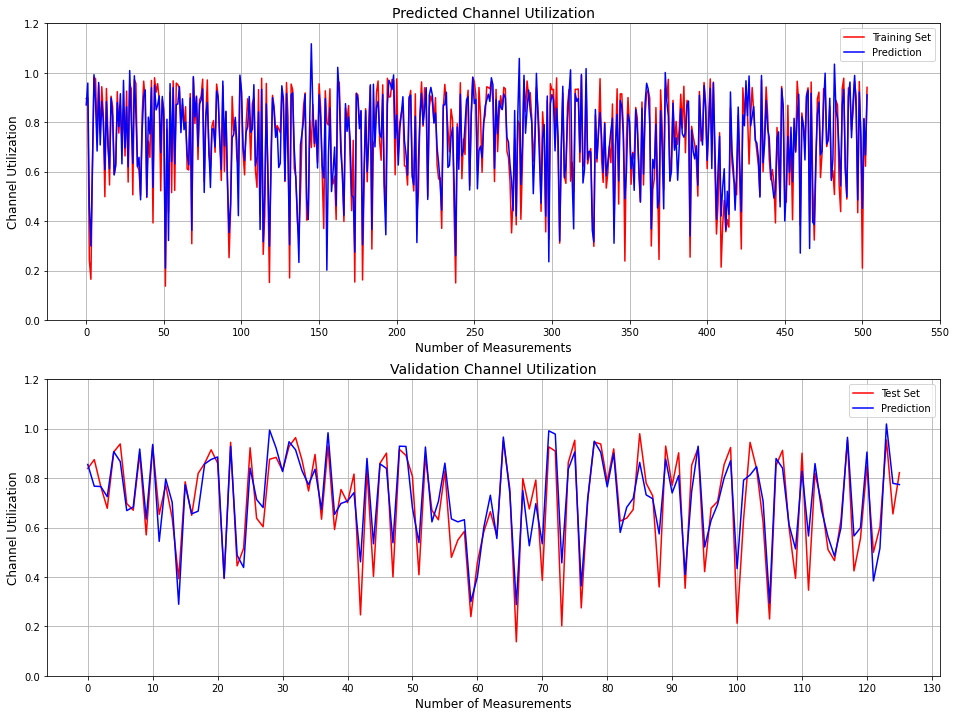

In [45]:
# Display Linear SVR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
lsvr_results = pred_results(linear_svr, linear_svr_pred, np.arange(0, 1.4, 0.2), 
                            50, 10, "upper right", "upper right")

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.787439
Std: +/- 0.028472
Min: 0.720345
Max: 0.839732

RMSE Scoring:
Mean: 0.092796
Std: +/- 0.006500
Min: 0.082439
Max: 0.104462


-- Fold: 2 --

R^2 Scoring:
Mean: 0.787041
Std: +/- 0.033153
Min: 0.720124
Max: 0.835757

RMSE Scoring:
Mean: 0.092727
Std: +/- 0.008041
Min: 0.080845
Max: 0.107425


-- Fold: 3 --

R^2 Scoring:
Mean: 0.788508
Std: +/- 0.052461
Min: 0.647294
Max: 0.886858

RMSE Scoring:
Mean: 0.091747
Std: +/- 0.011834
Min: 0.072244
Max: 0.118199


-- Fold: 4 --

R^2 Scoring:
Mean: 0.783933
Std: +/- 0.069227
Min: 0.578879
Max: 0.897948

RMSE Scoring:
Mean: 0.091867
Std: +/- 0.013004
Min: 0.068026
Max: 0.120375


-- Fold: 5 --

R^2 Scoring:
Mean: 0.785866
Std: +/- 0.072768
Min: 0.583464
Max: 0.889487

RMSE Scoring:
Mean: 0.091492
Std: +/- 0.014904
Min: 0.064980
Max: 0.126455


-- Fold: 6 --

R^2 Scoring:
Mean: 0.784831
Std: +/- 0.080639
Min: 0.585241
Max: 0.902268

RMSE Scoring:
Mean: 0.090952
Std: +/- 0.016243
Min: 0.058310
Max: 0.128288

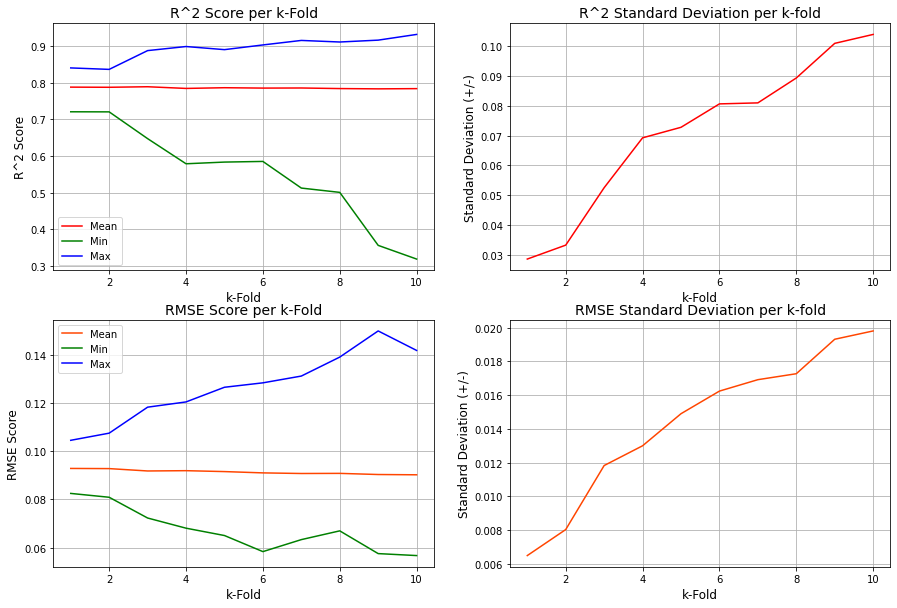

In [46]:
# Linear SVR - k-Fold Cross Validation
lsvr_cv = k_fold(linear_svr, 10)

# Show subplot
plt.show()

<table border = "1">
  <thead>
    <th colspan = "3">Linear SVR Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.783</td>
      <td>0.090</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.104</td>
      <td>0.020</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.320</td>
      <td>0.057</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.931</td>
      <td>0.142</td>
    </tr>
  </tbody>
</table>

In [47]:
# Apply Grid Search for parameter tuning

# linear_svr_params = {'C': [0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                      'kernel': ['linear'],
#                      'epsilon': [0.025, 0.05, 0.075, 0.1]}

linear_svr_params = {'C': [0.05],
                     'kernel': ['linear'],
                     'epsilon': [0.062]}

# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_mean_absolute_error', cv=lsvr_cv, n_jobs=-1)
# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_mean_squared_error', cv=lsvr_cv, n_jobs=-1)
# linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='neg_root_mean_squared_error', cv=lsvr_cv, n_jobs=-1)
linear_svr_grid = GridSearchCV(linear_svr, linear_svr_params, scoring='r2', cv=lsvr_cv, n_jobs=-1)
results = linear_svr_grid.fit(X_train, y_train)

# Summarize results
best_score = linear_svr_grid.best_score_
best_parameters = linear_svr_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 78.338%
Best Parameters:  {'C': 0.05, 'epsilon': 0.062, 'kernel': 'linear'}


<table border = "1">
  <thead>
    <th colspan = "2">Linear SVR Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>78.338%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.090</td>
    </tr>
    <tr>
      <td colspan = "2"><b>Best Parameters</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>0.05</td>
    </tr>
    <tr>
      <td><b>epsilon</b></td>
      <td>0.062</td>
    </tr>
    <tr>
      <td><b>kernel</b></td>
      <td>'linear'</td>
    </tr>
  </tbody>
</table>

### Kernel Support Vector Regression (Kernel SVR)

In [48]:
# Define Kernel SVR model
kernel_svr = SVR(kernel='rbf', C=1, gamma=0.12, epsilon=0.01)

# Train Kernel SVR model
kernel_svr.fit(X_train, y_train)

SVR(C=1, epsilon=0.01, gamma=0.12)

In [49]:
# Predict test set results
kernel_svr_pred = kernel_svr.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((kernel_svr_pred.reshape(len(kernel_svr_pred), 1), 
#                       y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(kernel_svr_pred)

MAE: 0.016
MSE: 0.001
RMSE: 0.023
R^2 Score: 0.988


<table border = "1">
  <thead>
    <th colspan = "5">Kernel SVR Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.016</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.001</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.023</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.988</td>
    </tr>
  </tbody>
</table>

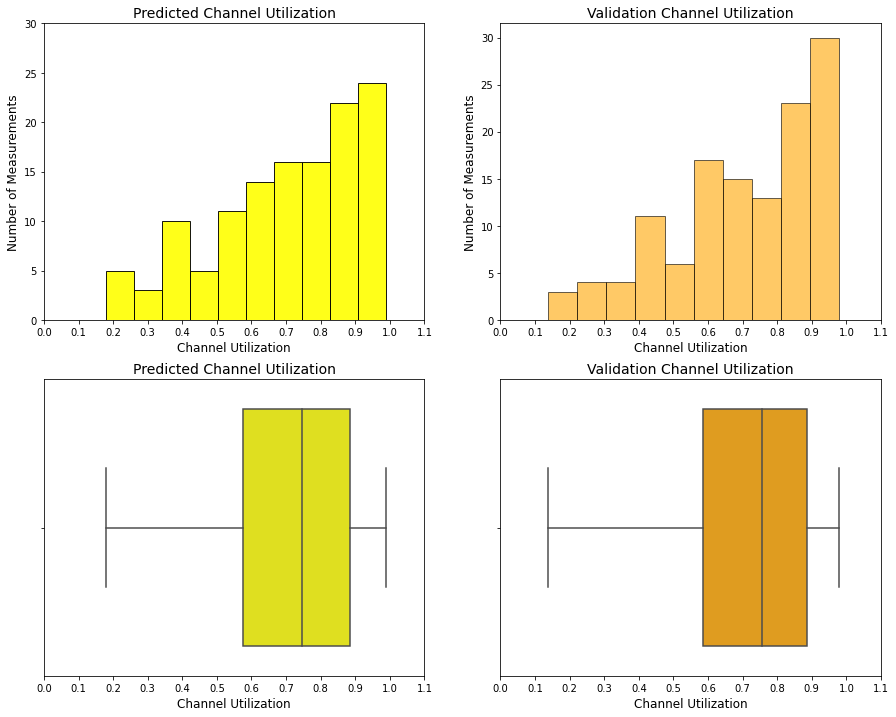

In [50]:
# Display Kernel SVR prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
ksvr_dist = plot_dist(kernel_svr_pred, 'yellow', 0.9, np.arange(0, 1.2, 0.1), 
                      np.arange(0, 35, 5))

# Show subplot
plt.show()

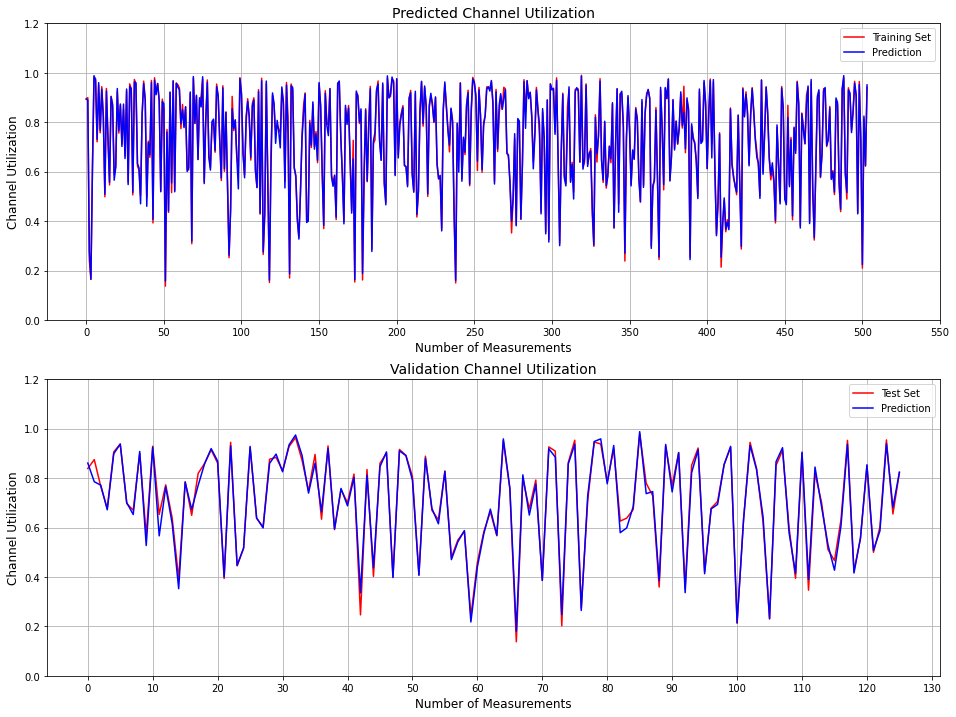

In [51]:
# Display Kernel SVR training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
ksvr_results = pred_results(kernel_svr, kernel_svr_pred, np.arange(0, 1.4, 0.2), 
                            50, 10, "upper right", "upper right")

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.963909
Std: +/- 0.005771
Min: 0.948900
Max: 0.973766

RMSE Scoring:
Mean: 0.038170
Std: +/- 0.002665
Min: 0.033409
Max: 0.043582


-- Fold: 2 --

R^2 Scoring:
Mean: 0.972846
Std: +/- 0.005144
Min: 0.955953
Max: 0.980766

RMSE Scoring:
Mean: 0.033042
Std: +/- 0.003048
Min: 0.027506
Max: 0.039182


-- Fold: 3 --

R^2 Scoring:
Mean: 0.975888
Std: +/- 0.005232
Min: 0.962512
Max: 0.985376

RMSE Scoring:
Mean: 0.031025
Std: +/- 0.003556
Min: 0.025144
Max: 0.040416


-- Fold: 4 --

R^2 Scoring:
Mean: 0.977181
Std: +/- 0.006401
Min: 0.950356
Max: 0.989523

RMSE Scoring:
Mean: 0.029948
Std: +/- 0.003503
Min: 0.021796
Max: 0.039235


-- Fold: 5 --

R^2 Scoring:
Mean: 0.978325
Std: +/- 0.006026
Min: 0.959834
Max: 0.988422

RMSE Scoring:
Mean: 0.029192
Std: +/- 0.003602
Min: 0.022376
Max: 0.039201


-- Fold: 6 --

R^2 Scoring:
Mean: 0.978997
Std: +/- 0.006359
Min: 0.964633
Max: 0.990676

RMSE Scoring:
Mean: 0.028572
Std: +/- 0.004252
Min: 0.019728
Max: 0.038455

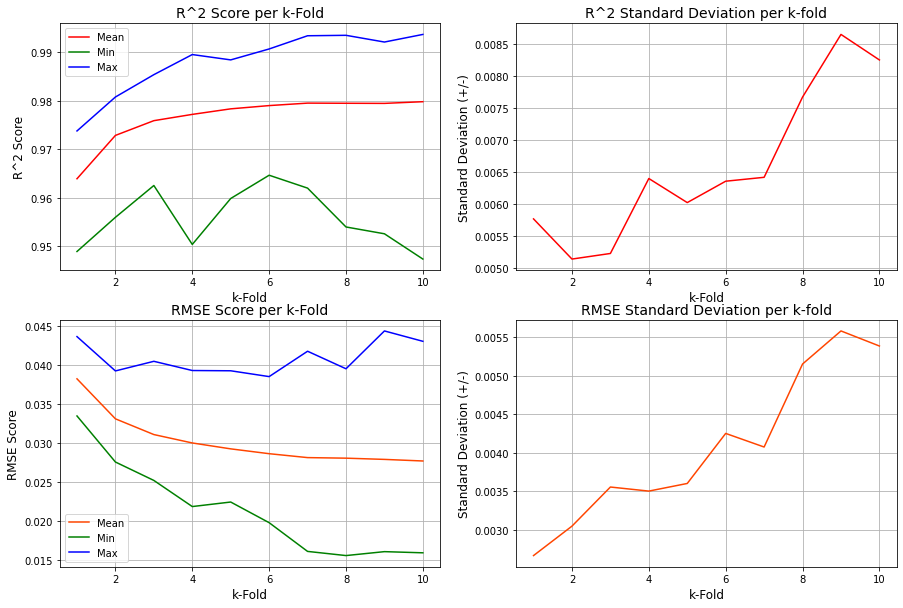

In [52]:
# Kernel SVR - k-Fold Cross Validation
ksvr_cv = k_fold(kernel_svr, 10)

<table border = "1">
  <thead>
    <th colspan = "3">Kernel SVR Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.980</td>
      <td>0.028</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.008</td>
      <td>0.005</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.947</td>
      <td>0.016</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.994</td>
      <td>0.043</td>
    </tr>
  </tbody>
</table>

In [53]:
# Apply Grid Search for parameter tuning

# kernel_svr_params = {'C': [0.25, 0.275, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1], 
#                      'kernel': ['rbf'],
#                      'gamma': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
#                      'epsilon': [0.025, 0.05, 0.075, 0.1]}

# R2 Scoring
kernel_svr_params = {'C': [1],
                     'kernel': ['rbf'],
                     'gamma': [0.12],
                     'epsilon': [0.01]}

# RMSE
# kernel_svr_params = {'C': [1], 
#                      'kernel': ['rbf'],
#                      'gamma': [0.043, 0.044, 0.045]}

# kernel_svr_grid = GridSearchCV(kernel_svr, kernel_svr_params, scoring='neg_mean_absolute_error', cv=ksvr_cv, n_jobs=-1)
# kernel_svr_grid = GridSearchCV(kernel_svr, kernel_svr_params, scoring='neg_mean_squared_error', cv=ksvr_cv, n_jobs=-1)
# kernel_svr_grid = GridSearchCV(kernel_svr, kernel_svr_params, scoring='neg_root_mean_squared_error', cv=ksvr_cv, n_jobs=-1)
kernel_svr_grid = GridSearchCV(kernel_svr, kernel_svr_params, scoring='r2', cv=ksvr_cv, n_jobs=-1)
results = kernel_svr_grid.fit(X_train, y_train)

# Summarize results
best_score = kernel_svr_grid.best_score_
best_parameters = kernel_svr_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score))  # RMSE
print("Best Parameters: ", best_parameters)

Best Score: 97.980%
Best Parameters:  {'C': 1, 'epsilon': 0.01, 'gamma': 0.12, 'kernel': 'rbf'}


<table border = "1">
  <thead>
    <th colspan = "2">Kernel SVR Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score</b></td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>97.980%</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.028</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>C</b></td>
      <td>1.0</td>
    </tr>
    <tr>
      <td><b>epsilon</b></td>
      <td>0.01</td>
    </tr>
    <tr>
      <td><b>gamma</b></td>
      <td>0.12</td>
    </tr>
    <tr>
      <td><b>kernel</b></td>
      <td>'rbf'</td>
    </tr>
  </tbody>
</table>

### XGBoost (XGB)

In [54]:
# Define XGBoost model
xgb_reg = XGBRegressor(max_depth=5, n_estimators=161, learning_rate=0.075, 
                       random_state=0)

# Train XGBoost model
xgb_reg.fit(X_train, y_train)

[19:46:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.075, max_depth=5, n_estimators=161)

In [55]:
# Predict test set results
xgb_pred = xgb_reg.predict(X_test)
# np.set_printoptions(precision = 2)
# print(np.concatenate((xgb_pred.reshape(len(xgb_pred), 1), y_test.reshape(len(y_test), 1)), 1 ))
# print('')

# Summarize results
summarize_results(xgb_pred)

MAE: 0.021
MSE: 0.001
RMSE: 0.030
R^2 Score: 0.980


<table border = "1">
  <thead>
    <th colspan = "5">XGBoost Prediction Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>MAE:<b></td>
      <td>0.021</td>
    </tr>
    <tr>
      <td><b>MSE:<b></td>
      <td>0.001</td>
    </tr>
    <tr>
      <td><b>RMSE:<b></td>
      <td>0.030</td>
    </tr>
    <tr>
      <td><b>R^2:<b></td>
      <td>0.980</td>
    </tr>
  </tbody>
</table>

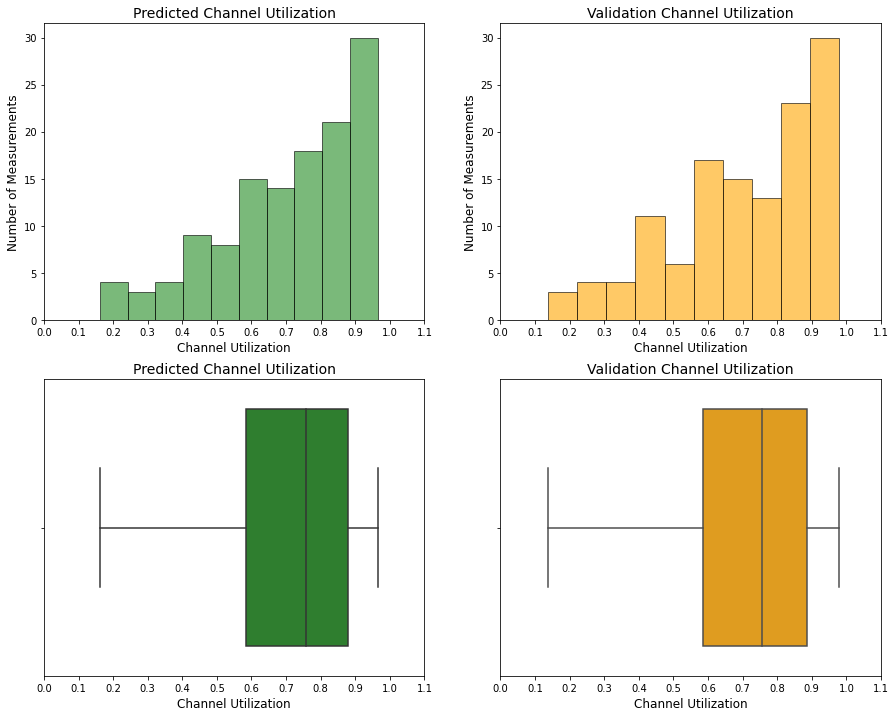

In [56]:
# Display XGBoost prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
xgb_dist = plot_dist(xgb_pred, 'forestgreen', 0.6, np.arange(0, 1.2, 0.1), 
                     np.arange(0, 35, 5))

# Show subplot
plt.show()

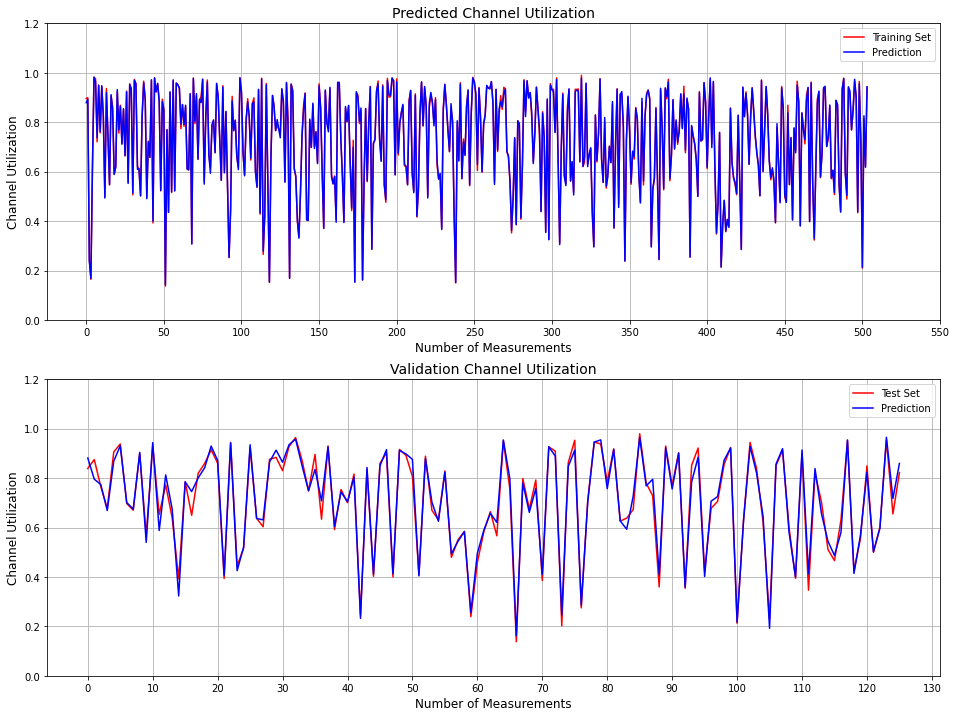

In [57]:
# Display XGB training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
xgb_results = pred_results(xgb_reg, xgb_pred, np.arange(0, 1.4, 0.2), 50, 10, 
                          "upper right", "upper right")

# Show subplot
plt.show()


-- Fold: 1 --

R^2 Scoring:
Mean: 0.953884
Std: +/- 0.008394
Min: 0.941448
Max: 0.972606

RMSE Scoring:
Mean: 0.043069
Std: +/- 0.003722
Min: 0.034585
Max: 0.048509


-- Fold: 2 --

R^2 Scoring:
Mean: 0.965276
Std: +/- 0.007976
Min: 0.946054
Max: 0.980517

RMSE Scoring:
Mean: 0.037210
Std: +/- 0.003709
Min: 0.029619
Max: 0.046200


-- Fold: 3 --

R^2 Scoring:
Mean: 0.966365
Std: +/- 0.011248
Min: 0.932178
Max: 0.983950

RMSE Scoring:
Mean: 0.036264
Std: +/- 0.004939
Min: 0.027355
Max: 0.053112


-- Fold: 4 --

R^2 Scoring:
Mean: 0.969945
Std: +/- 0.011803
Min: 0.904143
Max: 0.985280

RMSE Scoring:
Mean: 0.034134
Std: +/- 0.004580
Min: 0.026114
Max: 0.054519


-- Fold: 5 --

R^2 Scoring:
Mean: 0.971236
Std: +/- 0.009125
Min: 0.947904
Max: 0.985372

RMSE Scoring:
Mean: 0.033421
Std: +/- 0.004412
Min: 0.025386
Max: 0.043623


-- Fold: 6 --

R^2 Scoring:
Mean: 0.972347
Std: +/- 0.009172
Min: 0.945954
Max: 0.988149

RMSE Scoring:
Mean: 0.032622
Std: +/- 0.004362
Min: 0.021891
Max: 0.043763

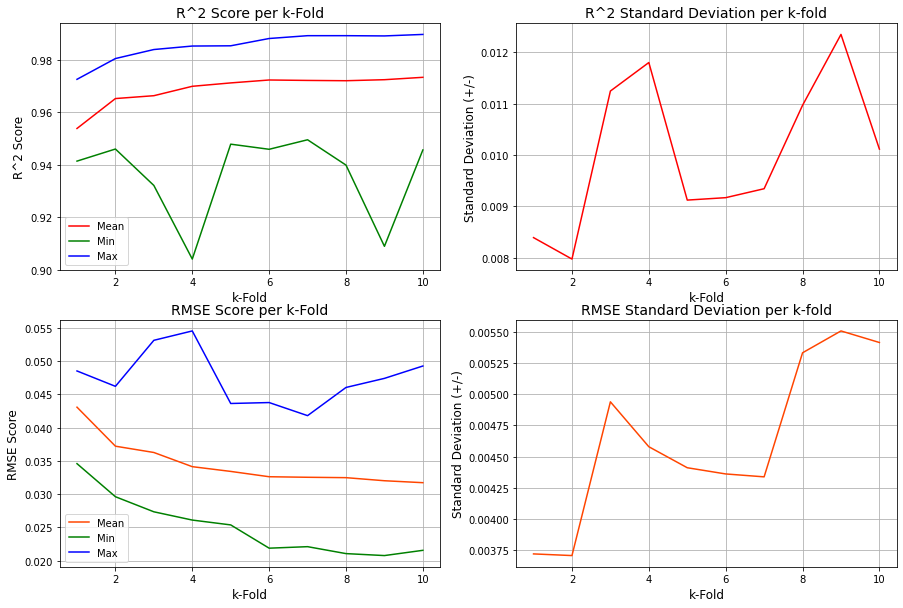

In [58]:
# XGBoost - k-Fold Cross Validation
xgb_cv = k_fold(xgb_reg, 10)

<table border = "1">
  <thead>
    <th colspan = "3">XGBoost Cross-Validation Results</th>
  </thead>
  <tbody>
    <tr>
      <td><b></b></td>
      <td><b>R^2</b></td>
      <td><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b>Mean</b></td>
      <td>0.973</td>
      <td>0.032</td>
    </tr>
    <tr>
      <td><b>Std.</b></td>
      <td>0.010</td>
      <td>0.005</td>
    </tr>
    <tr>
      <td><b>Min</b></td>
      <td>0.946</td>
      <td>0.022</td>
    </tr>
    <tr>
      <td><b>Max</b></td>
      <td>0.990</td>
      <td>0.050</td>
    </tr>
  </tbody>
</table>

In [59]:
# Apply Grid Search for parameter tuning

# xgb_grid = {'max_depth': [2, 4, 5, 6, 8, 10],
#             'n_estimators': [50, 100, 150, 200, 250],
#             'learning_rate': [0.01, 0.05, 0.1, 0.15],
#             'colsample_bytree': [0.2, 0.4, 0.6, 0.8, 1],
#             'num_leaves': [1, 5, 10, 20],
#             'min_split_gain': [2, 5, 10],
#            'reg_alpha': [0.5, 1, 1.5, 2, 5, 10],
#             'reg_lambda': [0.5, 1, 1.5, 2, 5, 10],
#            'subsample': [1, 1.5, 2, 5, 10],
#             'subsample_freq': [5, 10, 15, 20, 25],
#            'random_state': [0, 1, 2, 5, 42]}

xgb_params = {'max_depth': [5],
              'n_estimators': [161],
              'learning_rate': [0.075],
              'random_state': [0]}

# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_absolute_error', cv=xgb_cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_mean_squared_error', cv=xgb_cv, n_jobs=-1)
# xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='neg_root_mean_squared_error', cv=xgb_cv, n_jobs=-1)
xgb_grid = GridSearchCV(xgb_reg, xgb_params, scoring='r2', cv=xgb_cv, n_jobs=-1)
results = xgb_grid.fit(X_train, y_train)

# Summarize results
best_score = xgb_grid.best_score_
best_parameters = xgb_grid.best_params_
print("Best Score: %.3f%%" % (np.abs(best_score * 100)))  # R2
# print("Best Score: %.3f" % (np.abs(best_score)))  # RMSE
print("Best Parameters: ", best_parameters)

[19:48:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Score: 97.337%
Best Parameters:  {'learning_rate': 0.075, 'max_depth': 5, 'n_estimators': 161, 'random_state': 0}


<table border = "1">
  <thead>
    <th colspan = "2">XGBoost Grid Search Results</th>
  </thead>
  <tbody>
    <tr>
      <td colspan = "2"><b>Best Score</b></td>
    </tr>
    <tr>
      <td>R^2</td>
      <td>97.337%</td>
    </tr>
    <tr>
      <td>RMSE</td>
      <td>0.032</td>
    </tr>
    <tr>
      <td colspan="2"><b>Best Parameters:</b></td>
    </tr>
    <tr>
      <td><b>learning_rate</b></td>
      <td>0.075</td>
    </tr>
    <tr>
      <td><b>max_depth</b></td>
      <td>5</td>
    </tr>
    <tr>
      <td><b>n_estimators</b></td>
      <td>161</td>
    </tr>
    <tr>
      <td><b>random_state</b></td>
      <td>0</td>
    </tr>
  </tbody>
</table>

### Deep Neural Network (DNN)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                880       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 12,281
Trainable params: 12,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] -

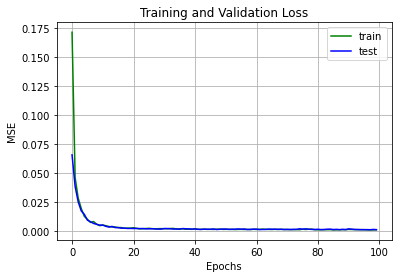

In [60]:
# Define DNN model
dnn_reg = Sequential()

# Input layer
dnn_reg.add(Dense(units=80, activation='relu', input_dim=X.shape[1]))
# Hidden layer(s)
dnn_reg.add(Dense(units=80, activation='relu'))
dnn_reg.add(Dense(units=60, activation='relu'))
dnn_reg.add(Dropout(0.02))
# Output layer
dnn_reg.add(Dense(units=1))

# Compile model
dnn_reg.compile(optimizer='adam', loss='mse')

# Summarize model
dnn_reg.summary()

# Train model (and capture results - history)
history = dnn_reg.fit(X_train, y_train, batch_size=32, epochs=100, 
                  validation_data=(X_test, y_test))

# Plot loss during training (Mean Squared Error - MSE)
plt.plot(history.history['loss'], 'g', label='train')
plt.plot(history.history['val_loss'], 'b', label='test')
# Plot title and labels
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
# Plot legend and grid
plt.legend()
plt.grid()

# Show loss results
plt.show()

In [61]:
# Predict test set results
dnn_pred = dnn_reg.predict(X_test)

# Summarize results
summarize_results(dnn_pred)

4/4 [==============================] - 0s 4ms/step
MAE: 0.025
MSE: 0.001
RMSE: 0.033
R^2 Score: 0.975


<table border = "1">
  <thead>
    <th colspan = "3">DNN Regression Scores</th>
  </thead>
    <tr>
      <td><b>MAE</b></td>
      <td>0.025</td>
    </tr>
    <tr>
      <td><b>MSE</b></td>
      <td>0.001</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>0.033</td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>0.975</td>
    </tr>
  </tbody>
</table>

Note: These results will vary due to the random nature of Deep Learning.

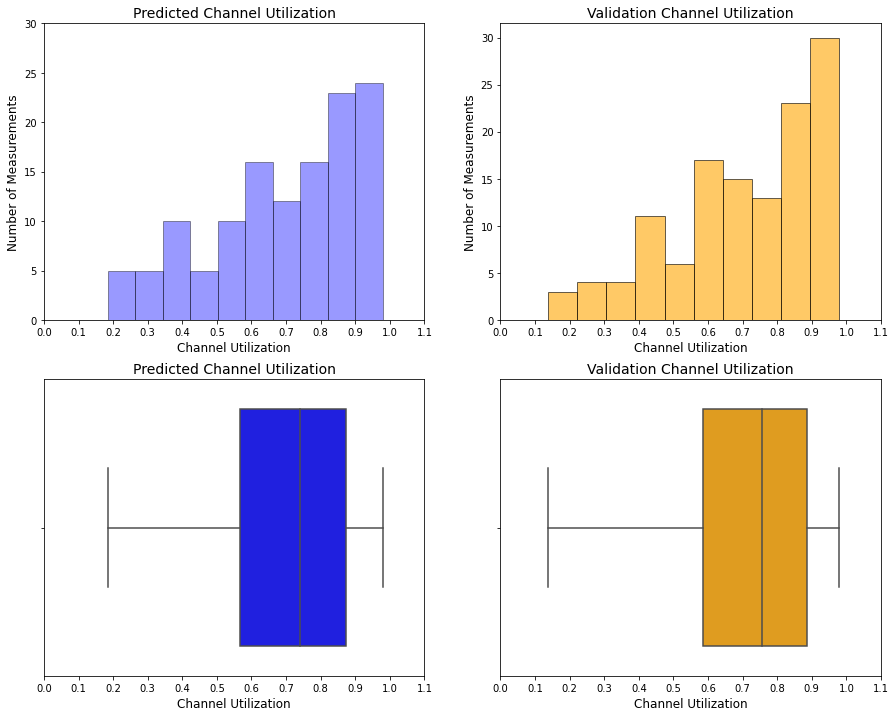

In [62]:
# Display DNN prediction and validation results
# Parameters: model, colour, alpha, x_range, y_range
dnn_dist = plot_dist(dnn_pred, 'blue', 0.4, np.arange(0, 1.2, 0.1), 
                     np.arange(0, 35, 5))

# Show subplot
plt.show()

16/16 [==============================] - 0s 3ms/step


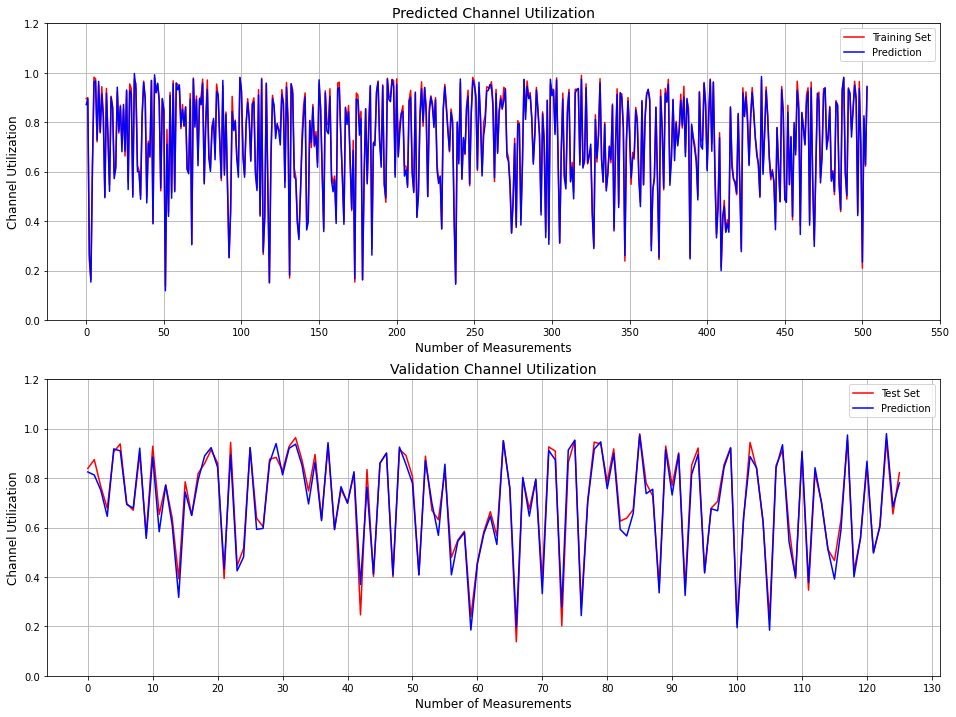

In [63]:
# Display DNN training and test set trend results
# model, pred, y_range, train_window, test_window, train_legend_loc, test_legend_loc
dnn_results = pred_results(dnn_reg, dnn_pred, np.arange(0, 1.4, 0.2), 50, 10, 
                          "upper right", "upper right")

# Show subplot
plt.show()

## 4. Final Results

<table border = "1">
  <thead>
    <th colspan = "5">Final Regression Scores</th>
  </thead>
  <tbody>
    <tr>
      <td><b>Model</b></td>
      <td colspan='2'><b>R^2</b></td>
      <td colspan='2'><b>RMSE</b></td>
    </tr>
    <tr>
      <td><b></b></td>
      <td><b>Pred.</b></td>
      <td><b>Val.</b></td>
      <td><b>Pred.</b></td>
      <td><b>Val.</b></td>
    </tr> 
    <tr>	
      <td><b>Linear Regression (LR)</b></td>
      <td>0.769</td>
      <td>0.847</td>
      <td>0.093</td>
      <td>0.082</td>
    </tr>
    <tr>
      <td><b>Linear SVR</b></td>
      <td>0.783</td>
      <td>0.845</td>
      <td>0.090</td>
      <td>0.082</td>
    </tr>
    <tr>
      <td><b>Kernel SVR</b></td>
      <td>0.980</td>
      <td>0.988</td>
      <td>0.028</td>
      <td>0.023</td>
    </tr>
    <tr>
      <td><b>XGBoost (XGB)</b></td>
      <td>0.973</td>
      <td>0.980</td>
      <td>0.032</td>
      <td>0.030</td>
    </tr>
    <tr>
      <td><b>Deep Neural Network (DNN)</b></td>
      <td>---</td>
      <td>0.975</td>
      <td>---</td>
      <td>0.033</td>
    </tr>
  </tbody>
</table>

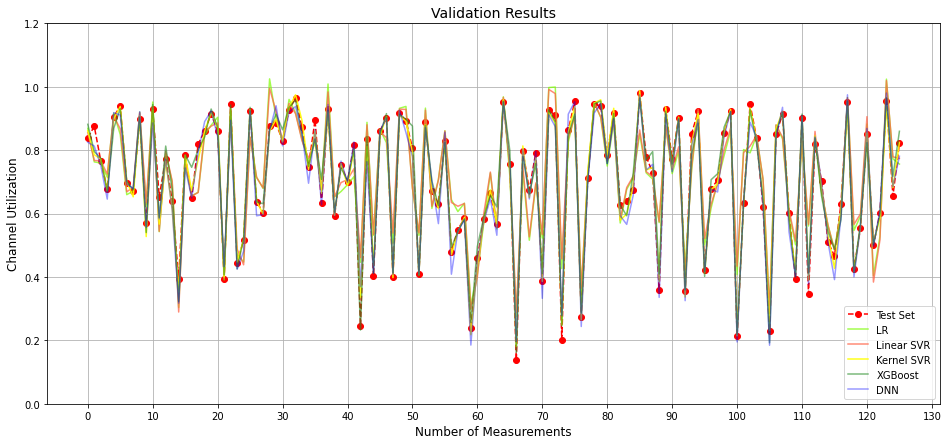

In [64]:
# Predicted vs Validation Results - Combined Distribution
overall_results = plt.figure(figsize=(16, 7))
model_labels = ['Test Set', 'LR', 'Linear SVR', 'Kernel SVR', 'XGBoost', 'DNN']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# LR
overall_results = plt.plot(lr_pred, color='lawngreen', alpha=0.7)
# Linear SVR
overall_results = plt.plot(linear_svr_pred, color='tomato', alpha=0.75)
# Kernel SVR
overall_results = plt.plot(kernel_svr_pred, color='yellow', alpha=0.9)
# XGBoost
overall_results = plt.plot(xgb_pred, color='forestgreen', alpha=0.6)
# DNN
overall_results = plt.plot(dnn_pred, color='blue', alpha=0.4)

# Plot properties
# Adjust axes ranges
plt.xticks(np.arange(0, len(y_test)+10, 10))
plt.yticks(np.arange(0, 1.4, 0.2))
# Plot title and labels
plt.xlabel('Number of Measurements', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Validation Results', fontsize=14)
# Plot legend and grid
plt.legend(labels=model_labels, loc='lower right')
plt.grid()

# Show subplot
plt.show()

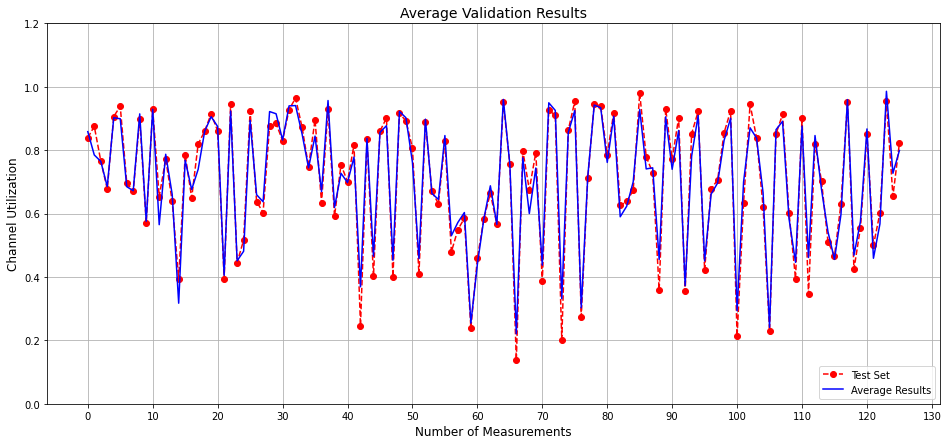

In [65]:
# Average Validation Results
average_results = plt.figure(figsize=(16, 7))
results_labels = ['Test Set', 'Average Results']

# Test Set
overall_results = plt.plot(y_test, 'go--', color = 'red')
# Compute Average Results
running_avg = []
for i in range(0, len(y_test)):
  running_avg.append( (lr_pred[i] + linear_svr_pred[i] + kernel_svr_pred[i] + 
                       xgb_pred[i] + dnn_pred[i])/5 )
# Plot Average Results
avg_results = plt.plot(running_avg[0:len(y_test)], color='blue')

# Plot properties
avg_window = 10
# Adjust axes ranges
plt.xticks(np.arange(0, len(y_test)+avg_window, avg_window))
plt.yticks(np.arange(0, 1.4, 0.2))
# Plot title and label
plt.xlabel('Number of Measurements', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Average Validation Results', fontsize=14)
# Plot legend and grid
plt.legend(labels=results_labels, loc='lower right')
plt.grid()

# Show subplot
plt.show()

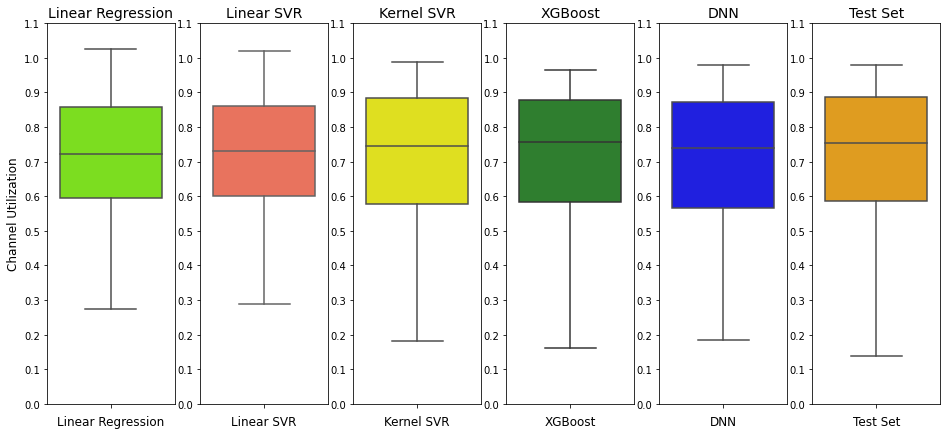

In [66]:
# Combined box plot distributions
box_plots_comb = plt.figure(figsize=(16, 7))

# Box plot for lr_pred
ax1 = box_plots_comb.add_subplot(1, 6, 1)
ax1 = sns.boxplot(y=lr_pred, color='lawngreen', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(0, 1.2, 0.1))
# Plot title and labels
plt.xlabel('Linear Regression', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Linear Regression', fontsize=14)

# Box plot for linear_svr_pred
ax2 = box_plots_comb.add_subplot(1, 6, 2)
ax2 = sns.boxplot(y=linear_svr_pred, color='tomato', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(0, 1.2, 0.1))
# Plot title and label
plt.xlabel('Linear SVR', fontsize=12)
plt.title('Linear SVR', fontsize=14)

# Box plot for kernel_svr_pred
ax3 = box_plots_comb.add_subplot(1, 6, 3)
ax3 = sns.boxplot(y=kernel_svr_pred, color='yellow', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(0, 1.2, 0.1))
# Plot title and label
plt.xlabel('Kernel SVR', fontsize=12)
plt.title('Kernel SVR', fontsize=14)

# Box plot for xgb_pred
ax4 = box_plots_comb.add_subplot(1, 6, 4)
ax4 = sns.boxplot(y=xgb_pred, color='forestgreen', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(0, 1.2, 0.1))
# Plot title and label
plt.xlabel('XGBoost', fontsize=12)
plt.title('XGBoost', fontsize=14)

# Box plot for dnn_pred
ax5 = box_plots_comb.add_subplot(1, 6, 5)
ax5 = sns.boxplot(y=dnn_pred, color='blue', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(0, 1.2, 0.1))
# Plot title and label
plt.xlabel('DNN', fontsize=12)
plt.title('DNN', fontsize=14)

# Box plot for y_test
ax6 = box_plots_comb.add_subplot(1, 6, 6)
ax6 = sns.boxplot(y=y_test, color='orange', orient='v')
# Adjust Y-Axis Range
plt.yticks(np.arange(0, 1.2, 0.1))
# Plot title and label
plt.xlabel('Test Set', fontsize=12)
plt.title('Test Set', fontsize=14)

# Show subplot
plt.show()

## 5. Remarks

**Highlights:**

- Prediction and validation scores were relatively close to each other (except for the Linear Regression model).
- RMSE was relatively low (less than 0.1). This is an ideal case with no random statistical interference.
- The Linear Regression (LR) model performed the worst while the Kernel SVR model performed the best. This is expected given that the LR model is the simplest and most basic regression model there is.

**Challenges Faced:**

- Determining the number of trees for XGBoost.
- When tuning XGBoost, there were some parameters that did not yield a significant improvement in R2 or RMSE scoring (i.e: subsample).
- In both cases, I had to consider the tradeoffs between fine-tuning some parameters for greater accuracy or using lower and/or default parameter values in order to optimize speed.

**Suggested Improvements:**

- Could try evaluating with other tree-based models (i.e: Decision Tree).
